# 가설6 : 청소년 관람불가 영화는 평론가보다 관객이 더 좋아할 것이다

In [5]:
#패키지 다운
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
from matplotlib import rc
from statsmodels.formula.api import ols

In [6]:
#movie_fin 파일 로드
movie_fin = pd.read_csv('https://raw.githubusercontent.com/yujin-jo/mini-project-team1/main/1.%20Crawling/data/movie_fin.csv')
movie_fin.head(2)

,순번,개봉연도,영화명,감독,등급,국적,장르,전국매출액,전국관객수,전국스크린수,관람객평균평점,전문가평균평점,왓챠평균평점
0,1,2015,베테랑,류승완,15세이상관람가,한국,액션,105024756250,13395400,1064,4.62,3.69,4.0
1,2,2015,암살,최동훈,15세이상관람가,한국,액션,98463132781,12705700,1519,4.55,3.12,4.0


### 등급별 영화개수 카운트

In [9]:
#개봉연도-등급 별 영화개수 count 피봇테이블
movie_year_rating = movie_fin.pivot_table(values="영화명",index = '개봉연도',columns = "등급",aggfunc="count")
movie_year_rating

등급,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가
개봉연도,,,,
2015,12,12,3,3
2016,14,9,4,3
2017,10,14,3,3
2018,18,9,2,1
2019,11,13,4,2


In [8]:
#한글깨짐 해결
rc('font', family='AppleGothic')

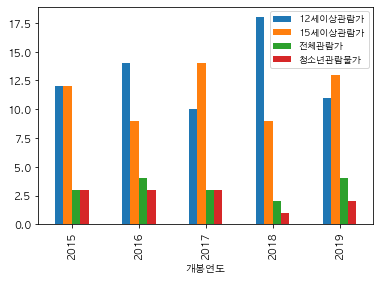

In [10]:
#피봇테이블 시각화 - bar plot
movie_year_rating.plot.bar()
plt.legend(fontsize=9)
plt.show()

### 청소년관람불가 영화
* 관람객보다 전문가가 **청소년관람불가 영화**에 높은 평점을 줄까??

In [44]:
#등급이 청소년관람불가인 영화 테이블
movie_nc_1 = movie_fin[movie_fin['등급'] == '청소년관람불가']
movie_nc_1.head(2)

,순번,개봉연도,영화명,감독,등급,국적,장르,전국매출액,전국관객수,전국스크린수,관람객평균평점,전문가평균평점,왓챠평균평점
3,4,2015,내부자들,우민호,청소년관람불가,한국,범죄,56464117657,7055074,1075,4.53,3.00,4.0
4,5,2015,킹스맨 : 시크릿 에이전트,매튜 본,청소년관람불가,미국,액션,50333635795,6125154,706,4.51,3.71,4.1


In [45]:
#필요한 데이터만으로 만든 테이블
movie_nc = movie_nc_1[['개봉연도','영화명','등급','관람객평균평점','전문가평균평점']]
movie_nc

,개봉연도,영화명,등급,관람객평균평점,전문가평균평점
3,2015,내부자들,청소년관람불가,4.53,3.00
4,2015,킹스맨 : 시크릿 에이전트,청소년관람불가,4.51,3.71
27,2015,강남 1970,청소년관람불가,3.88,2.71
43,2016,아가씨,청소년관람불가,3.84,3.73
46,2016,데드풀,청소년관람불가,4.26,3.17
55,2016,아수라,청소년관람불가,3.27,3.10
64,2017,범죄도시,청소년관람불가,4.64,3.00
69,2017,킹스맨 : 골든 서클,청소년관람불가,4.30,2.42
81,2017,프리즌,청소년관람불가,4.12,3.00
101,2018,데드풀2,청소년관람불가,4.54,2.88


In [38]:
#관람객과 전문가의 평균평점 차
movie_nc['평점차'] = movie_nc['관람객평균평점'] - movie_nc['전문가평균평점']

<ipython-input-38-3db2a90bf3d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_nc['평점차'] = movie_nc['관람객평균평점'] - movie_nc['전문가평균평점']


,개봉연도,영화명,등급,관람객평균평점,전문가평균평점,평점차
3,2015,내부자들,청소년관람불가,4.53,3.00,1.53
4,2015,킹스맨 : 시크릿 에이전트,청소년관람불가,4.51,3.71,0.80
27,2015,강남 1970,청소년관람불가,3.88,2.71,1.17
43,2016,아가씨,청소년관람불가,3.84,3.73,0.11
46,2016,데드풀,청소년관람불가,4.26,3.17,1.09
55,2016,아수라,청소년관람불가,3.27,3.10,0.17
64,2017,범죄도시,청소년관람불가,4.64,3.00,1.64
69,2017,킹스맨 : 골든 서클,청소년관람불가,4.30,2.42,1.88
81,2017,프리즌,청소년관람불가,4.12,3.00,1.12
101,2018,데드풀2,청소년관람불가,4.54,2.88,1.66


In [39]:
#평점차가 큰 순 으로 정렬
movie_nc = movie_nc.sort_values('평점차',ascending = False)

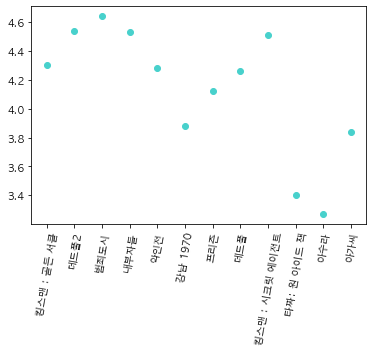

In [40]:
#영화별 관람객평균평점 plot
plt.plot(movie_nc['영화명'],movie_nc["관람객평균평점"],'ro',color='mediumturquoise')
plt.xticks(movie_nc['영화명'], fontsize=10, rotation=80)
plt.show()

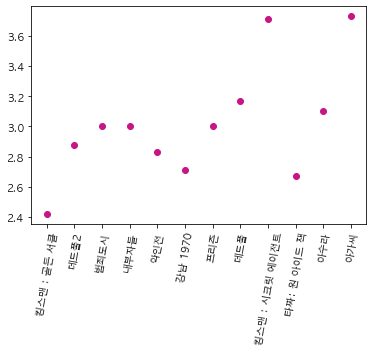

In [41]:
#영화별 전문가평균평점 plot
plt.plot(movie_nc['영화명'],movie_nc["전문가평균평점"],'ro',color='mediumvioletred')
plt.xticks(movie_nc['영화명'], fontsize=10, rotation=80)
plt.show()

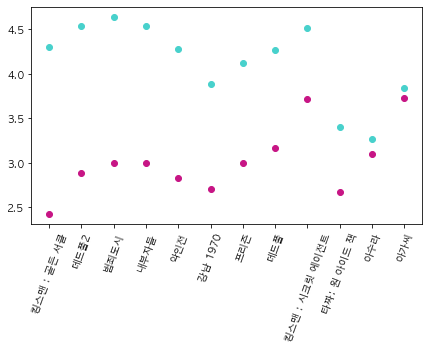

In [42]:
#합치기
fig = plt.figure(figsize=(7,4)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot()

plt.plot(movie_nc['영화명'],movie_nc["관람객평균평점"],'ro',color='mediumturquoise')
plt.plot(movie_nc['영화명'],movie_nc["전문가평균평점"],'ro',color='mediumvioletred')
plt.xticks(movie_nc['영화명'], fontsize=10, rotation=70)
plt.show()

In [46]:
movie_nc.corr(method='pearson') # 1에 가까울수록 양의 상관관계 -1에 가까울수록 음의 상관관계

,개봉연도,관람객평균평점,전문가평균평점
개봉연도,1.000000,-0.110895,-0.472800
관람객평균평점,-0.110895,1.000000,0.070189
전문가평균평점,-0.472800,0.070189,1.000000


### 회귀분석

In [47]:
ols("전문가평균평점~등급",data = movie_nc).fit().summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전문가평균평점   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 24 Aug 2021   Prob (F-statistic):                nan
Time:                        20:01:08   Log-Likelihood:                -5.1027
No. Observations:                  12   AIC:                             12.21
Df Residuals:                      11   BIC:                             12.69
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0183      0.112     27.041      0.000       2.773       3.264
==============================================================================
Omnibus:                        1.830   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                0.878
Skew:                           0.657   Prob(JB):                        0.645
Kurtosis:                       2.837   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
ols("전문가평균평점~등급",data = movie_fin).fit().summary() # fin VS nc

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전문가평균평점   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8296
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.480
Time:                        20:02:19   Log-Likelihood:                -121.09
No. Observations:                 150   AIC:                             250.2
Df Residuals:                     146   BIC:                             262.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1314      0.068     45.915      0.000       2.997       3.266
등급[T.15세이상관람가]    -0.0877      0.100     -0.879      0.381      -0.285       0.109
등급[T.전체관람가]        0.1324      0.153      0.863      0.390      -0.171       0.436
등급[T.청소년관람불가]     -0.1131      0.173     -0.654      0.514      -0.454       0.228
==============================================================================
Omnibus:                        1.916   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.521
Skew:                          -0.119   Prob(JB):                        0.467
Kurtosis:                       3.432   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ols("관람객평균평점~등급",data = movie_fin).fit().summary()

In [ ]:
ols("전국관객수~등급",data = movie_fin).fit().summary()

In [ ]:
ols("전국매출액~등급",data = movie_fin).fit().summary()